In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

data = pd.read_csv("dataset_1.csv", sep=";")

Total de dados: 2500



,f1,f2
0,-6.210786,-1.968484
1,-5.218359,7.979712
2,-4.860193,3.162593
3,-3.897816,9.486367
4,3.605567,-6.619680


f1    False
f2    False
dtype: bool

Total de dados: 2500



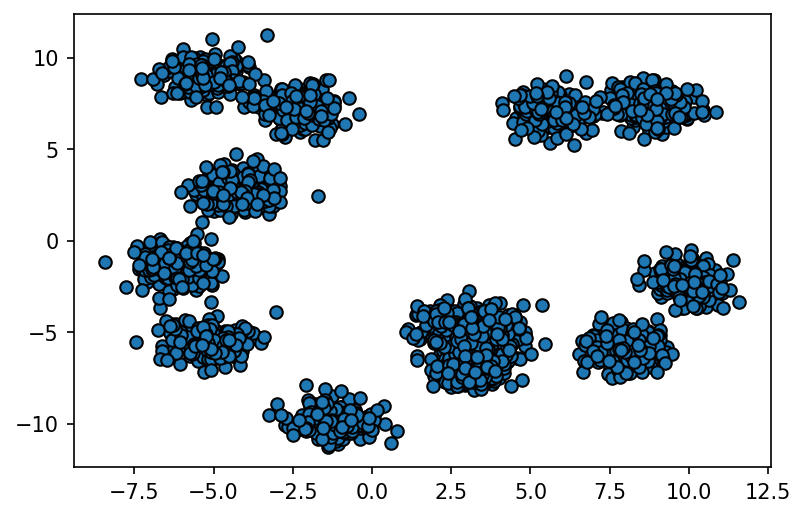

In [7]:
print(f"Total de dados: {len(data)}\n")

display(data.head())
print("\n")
display(data.isna().any())
data = data.dropna()

print(f"Total de dados: {len(data)}\n")

plt.rcParams['figure.dpi'] = 150
plt.scatter(data["f1"], data["f2"], marker="o", edgecolor="black")
plt.show()

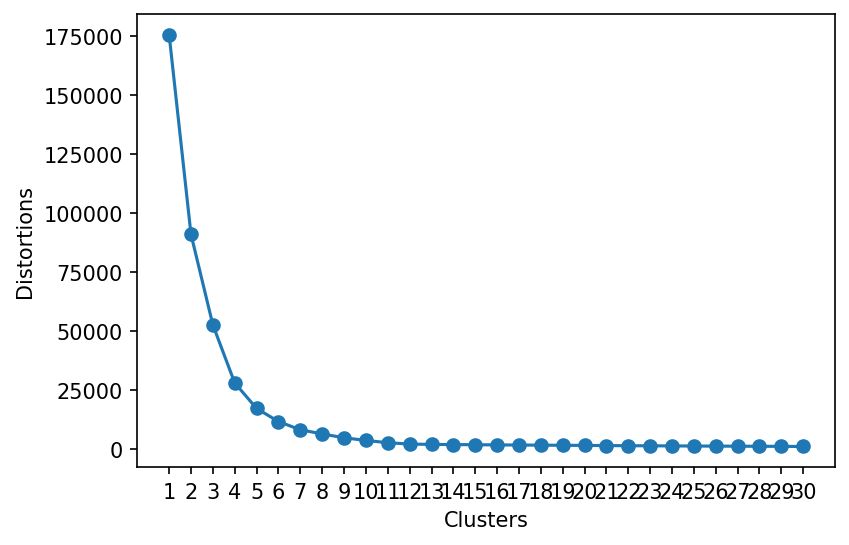

In [8]:
#Elbow Method

x = [[i["f1"], i["f2"]] for _, i in data.iterrows()]
x = np.array(x)

distortions = []
for i in range(1, 31):
    km = KMeans(n_clusters=i)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1, 31), distortions, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.xticks(range(1, 31))
plt.show()

In [9]:
modelo = KMeans(n_clusters=11)
modelo.fit(x)

KMeans(n_clusters=11)

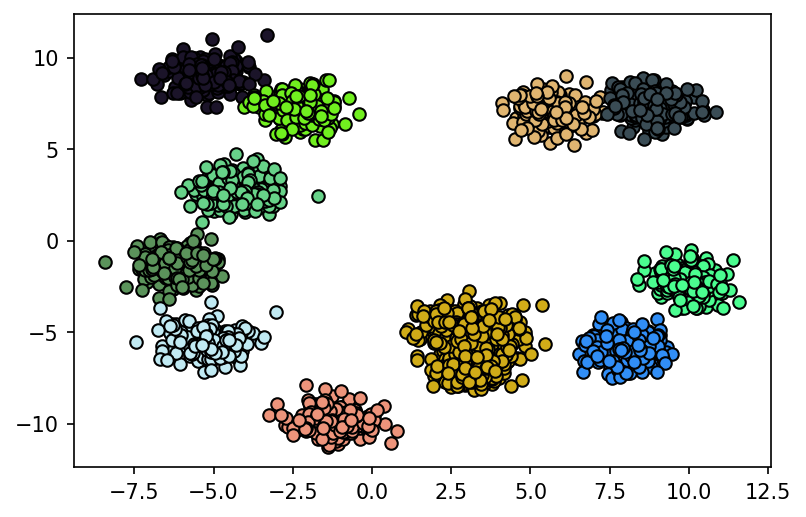

In [10]:
y_km = modelo.predict(x)
markers = list(Line2D.markers.keys())

for i in range(11):
    plt.scatter(x[y_km == i, 0], x[y_km == i, 1], color=np.random.rand(3,), marker="o", edgecolor="black", label="grupo 1")

plt.show()

#### O Elbow Method (Método do cotovelo) é uma heurística usada para determinar o número de clusters em um conjunto de dados, ele faz isso representando graficamente a variação em função do número de clusters para escolher o valor onde começa a sugir uma constante (reta), para se utilizar dessa referencia nas demais operações, sendo assim o "valor ideal".